__Titanic Survival analysis - Support Vector Machine__

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')


In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\vishal\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

# Loading Dataset

In [2]:
data = pd.read_csv('titanic_train.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking Shape of the Dataset

data.shape

(891, 12)

# Missing Values Treatment

In [4]:
# Checking Null Values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- In dataset we have Total 891 Rows and 12 Columns
- Cabin : Out of 891 Rows 687 Rows have missing values i.e. 77% data is missing
- hence cabin column is not relevant

In [5]:
# Dropping Cabin Column

data.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
data.shape

(891, 11)

## Filling Missing values

In [7]:
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:ylabel='Frequency'>

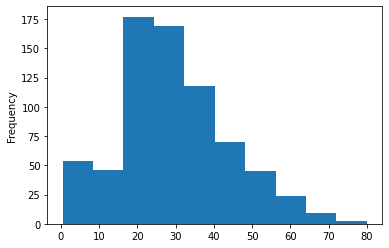

In [9]:
data['Age'].plot.hist()

In [10]:
# Filling missing values from Age column with .mean() as data is having bell shaped curve

data['Age'].fillna(data['Age'].mean(), inplace=True)

In [11]:
# Embarked column is categorical so calculating the mode and filling it

data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- Maximum passengers are from 'S' = Southampton i.e. 644

- Hence, filling missing values from Embarked column with 'S' 


In [12]:
data['Embarked'].fillna(value='S', inplace=True)

In [13]:
# Checking missing values after missing values treatment

data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- No Missing values remained in data

## Dropping Irrelevant Columns from dataset

- Name , PassengerId and Ticket Number are irrelevant columns from dataset having no impact Survival of any of the passenger 

In [14]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Converting categorical (text) data to numerical

##  Encoding data using label encoding 

In [17]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

data["Sex"] = lab.fit_transform(data["Sex"])
data["Embarked"] = lab.fit_transform(data["Embarked"])


In [18]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


__________________

# Exploratory Data Analysis

In [19]:
data1 = pd.read_csv('titanic_train.csv')    # Performing EDA with Original data

In [20]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Catplot

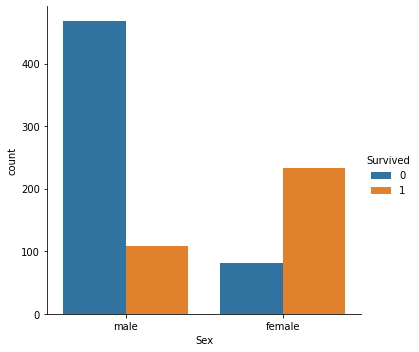

In [21]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data1)

- Survival rate of male passengers is 20% and Survival rate of female passengers is 75%

- Therefore, whether a passenger is a male or a female plays an important role in determining who is going to survive.


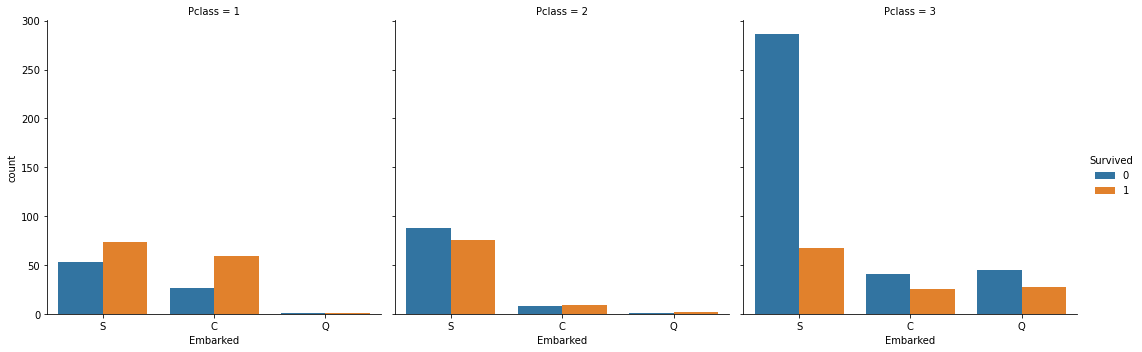

In [22]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = data1)

## Heatmap

- Grouping the dataset by Pclass and Survived
- Unstack Pclass and Survived

In [23]:
group = data1.groupby(['Pclass', 'Survived']) 

pclass_survived = group.size().unstack() 


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

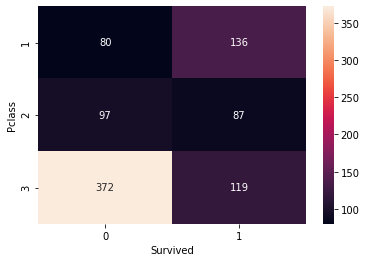

In [24]:
# Heatmap - Color encoded 2D representation of data. 

sns.heatmap(pclass_survived, annot = True, fmt ="d")


- It Shows whether higher class passengers had more survival rate than the lower class and vice varsa.

- class 1 passengers have higher rate of survival chance compared to class 2 and class 3.

- Hence, Pclass is important deciding factor w.r.t. survival of passengers

_______________________

# Support Vector Machine

## Importing Libraries

In [25]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score


__By Using Function__

In [28]:
def prediction(col):
    
    clf = svm.SVC(gamma = 0.01, C = 100)

    for i in col:
        x = data.drop([i], axis=1)
        print("--------------------------------------------------------------------------------------")
        print(f"Here Dependent Variable is {i} and remaining are Independent Variables")
        print("x :\n", x.head())
        y = data[i]
        print("\ny:\n", y.head())
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = clf.fit(x_train,y_train)
        pred = model.predict(x_test)
    
        print(f"\nAccuracy for {i} is: ", accuracy_score(y_test, pred, normalize=True))
        print(f"Confusion Matrix for {i} is \n", confusion_matrix(y_test, pred))

column = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']        
prediction(column)

--------------------------------------------------------------------------------------
Here Dependent Variable is Survived and remaining are Independent Variables
x :
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

y:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Accuracy for Survived is:  0.7611940298507462
Confusion Matrix for Survived is 
 [[141  27]
 [ 37  63]]
--------------------------------------------------------------------------------------
Here Dependent Variable is Pclass and remaining are Independent Variables
x :
    Survived  Sex   Age  SibSp  Parch     Fare  Embarked
0         0    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0


# Resultant Accuracy Score

In [29]:
score = { 'Dependent Variable': ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked'],
         'Accuracy Score': [0.7612,0.8955,0.75,0.7425,0.8283,0.7462],
         'Total ':[268,268,268,268,268,268],
         'Correct Prediction':[204,232,201,199,222,200],
         'Incorrect Prediction':[64,36,67,69,46,68] }
score = pd.DataFrame(score)
score


,Dependent Variable,Accuracy Score,Total,Correct Prediction,Incorrect Prediction
0,Survived,0.7612,268,204,64
1,Pclass,0.8955,268,232,36
2,Sex,0.7500,268,201,67
3,SibSp,0.7425,268,199,69
4,Parch,0.8283,268,222,46
5,Embarked,0.7462,268,200,68


# Conclusion

- Pclass variable is giving high accuracy score - 89% than other Dependent Variables.

_________________